In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer



In [10]:
df = pd.read_parquet("D:/projeto_lapes/datalake/silver/silver_pacientes.parquet")
df.head()

,Image Index,Finding Labels,Follow-up #,Patient Age,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],genero
0,00000001_000.png,Cardiomegaly,0,58,PA,2682,2749,0.143,0.143,Male
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,PA,2894,2729,0.143,0.143,Male
2,00000001_002.png,Cardiomegaly|Effusion,2,58,PA,2500,2048,0.168,0.168,Male
3,00000002_000.png,No Finding,0,81,PA,2500,2048,0.171,0.171,Male
4,00000003_000.png,Hernia,0,81,PA,2582,2991,0.143,0.143,Female


In [11]:
print(df.isnull().sum())

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient Age                    0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
genero                         0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112104 non-null  object 
 1   Finding Labels               112104 non-null  object 
 2   Follow-up #                  112104 non-null  int64  
 3   Patient Age                  112104 non-null  int64  
 4   View Position                112104 non-null  object 
 5   OriginalImage[Width          112104 non-null  int64  
 6   Height]                      112104 non-null  int64  
 7   OriginalImagePixelSpacing[x  112104 non-null  float64
 8   y]                           112104 non-null  float64
 9   genero                       112104 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.6+ MB


In [13]:
df.describe()

,Follow-up #,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000
mean,8.574172,46.872574,2646.035253,2486.393153,0.155651,0.155651
std,15.406734,16.598152,341.243771,401.270806,0.016174,0.016174
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800


In [14]:
df = df[df["Patient Age"] < 100]

# Verificando o resultado
print(df["Patient Age"].describe())

count    112104.000000
mean         46.872574
std          16.598152
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max          95.000000
Name: Patient Age, dtype: float64


In [15]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112104 non-null  object 
 1   Finding Labels               112104 non-null  object 
 2   Follow-up #                  112104 non-null  int64  
 3   Patient Age                  112104 non-null  int64  
 4   View Position                112104 non-null  object 
 5   OriginalImage[Width          112104 non-null  int64  
 6   Height]                      112104 non-null  int64  
 7   OriginalImagePixelSpacing[x  112104 non-null  float64
 8   y]                           112104 non-null  float64
 9   genero                       112104 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.6+ MB


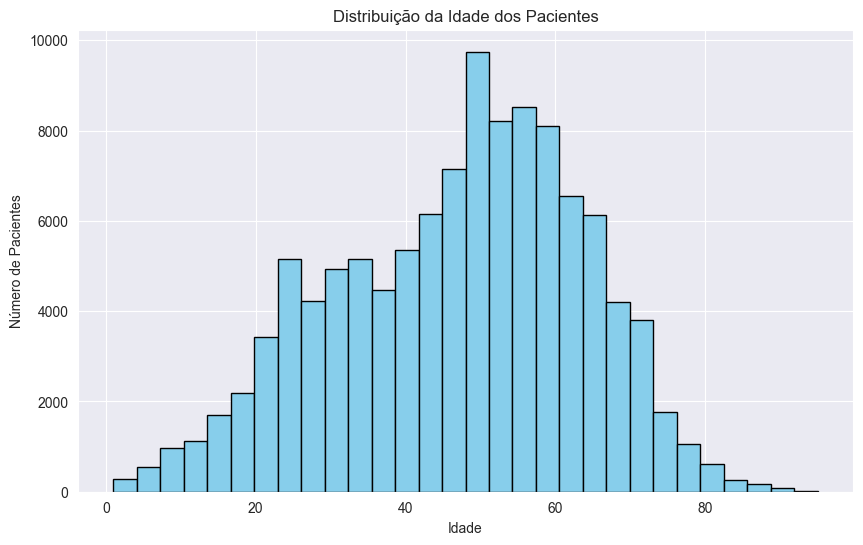

In [16]:

#distribuicao de idade
plt.figure(figsize=(10, 6))
plt.hist(df["Patient Age"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribuição da Idade dos Pacientes")
plt.xlabel("Idade")
plt.ylabel("Número de Pacientes")
plt.grid(True)
plt.show()


In [17]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

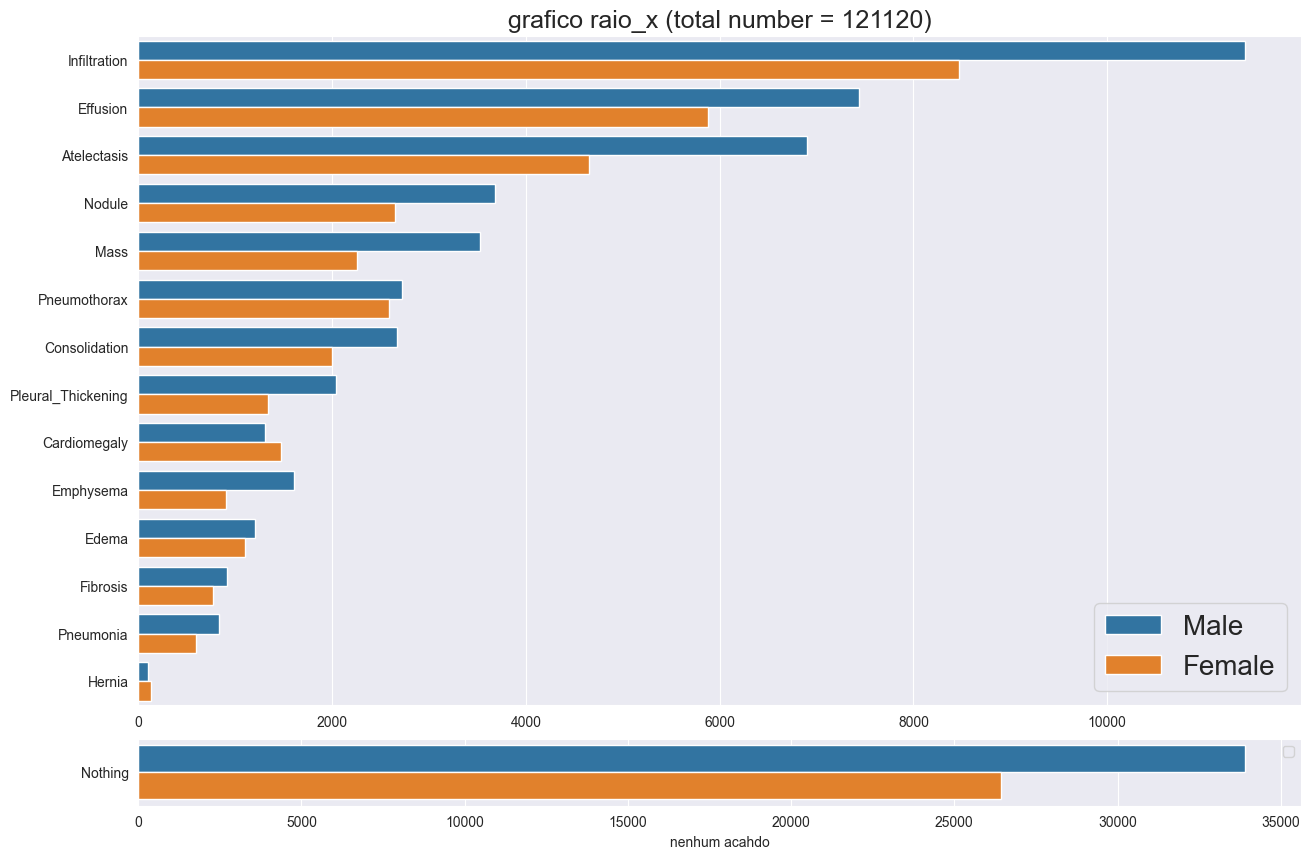

In [26]:

plt.figure(figsize=(15,10))
grid_spec = gridspec.GridSpec(8,1)
eixo_1 = plt.subplot(grid_spec[:7, :])
eixo_2 = plt.subplot(grid_spec[7, :])
data_1 = pd.melt(df,
             id_vars=['genero'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data_1 = data_1.loc[data_1.Count>0]
g=sns.countplot(y='Category',hue='genero',data=data_1, ax=eixo_1, order = data_1['Category'].value_counts().index)
eixo_1.set( ylabel="",xlabel="")
eixo_1.legend(fontsize=20)
eixo_1.set_title('grafico raio_x (total number = 121120)',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data_2 = pd.melt(df,
             id_vars=['genero'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data_2 = data_2.loc[data_2.Count>0]
g=sns.countplot(y='Category',hue='genero',data=data_2,ax=eixo_2)
eixo_2.set( ylabel="",xlabel="nenhum acahdo")
eixo_2.legend('')
plt.subplots_adjust(hspace=.5)

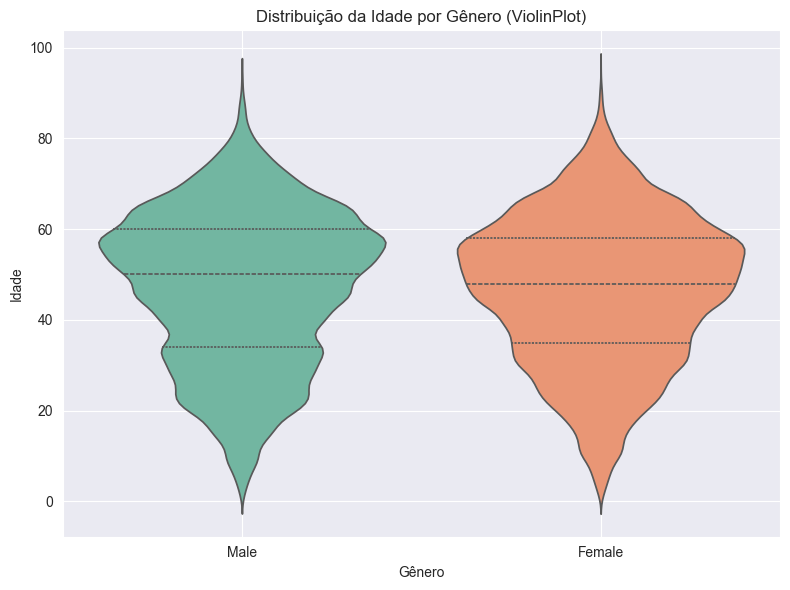

In [19]:
df = df[
    (df['Patient Age'].between(0, 120)) &
    (df['genero'].isin(['Male', 'Female']))
]


plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='genero', y='Patient Age',palette='Set2',hue='genero', inner='quartile')
plt.title("Distribuição da Idade por Gênero (ViolinPlot)")
plt.xlabel("Gênero")
plt.ylabel("Idade")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='faixa_etaria'>

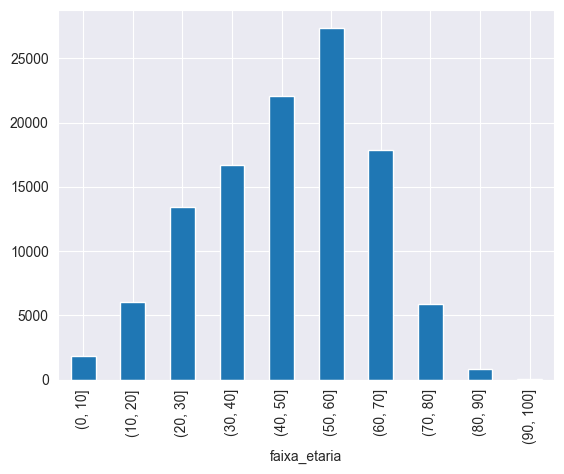

In [20]:

df['faixa_etaria'] = pd.cut(df['Patient Age'], bins=range(0, 110, 10))
df['faixa_etaria'].value_counts().sort_index().plot(kind='bar')

<Axes: >

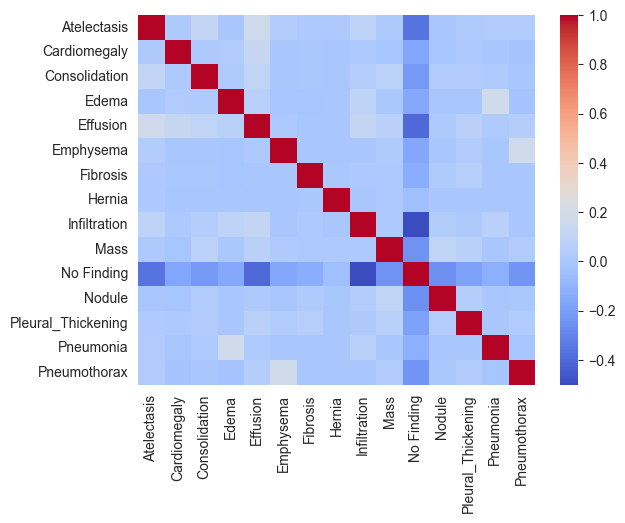

In [21]:

mlb = MultiLabelBinarizer()
labels = df['Finding Labels'].str.split('|')
multi_hot = pd.DataFrame(mlb.fit_transform(labels), columns=mlb.classes_)
sns.heatmap(multi_hot.corr(), cmap="coolwarm")


<Axes: xlabel='View Position'>

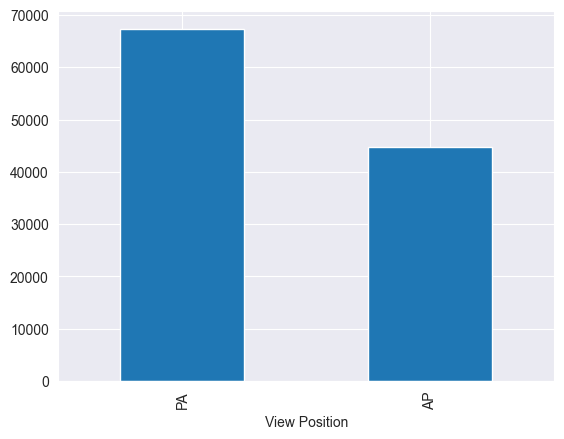

In [14]:
df['View Position'].value_counts().plot(kind='bar')

In [15]:

labels = df['Finding Labels'].dropna().str.split('|').sum()
Counter(labels).most_common(10)


[('No Finding', 60353),
 ('Infiltration', 19891),
 ('Effusion', 13316),
 ('Atelectasis', 11558),
 ('Nodule', 6331),
 ('Mass', 5779),
 ('Pneumothorax', 5301),
 ('Consolidation', 4667),
 ('Pleural_Thickening', 3384),
 ('Cardiomegaly', 2776)]

In [23]:
from collections import Counter
labels = df['Finding Labels'].dropna().str.split('|').explode()
top10 = Counter(labels).most_common(10)

# Separar os nomes e as contagens para o gráfico
labels_names = [item[0] for item in top10]
labels_counts = [item[1] for item in top10]



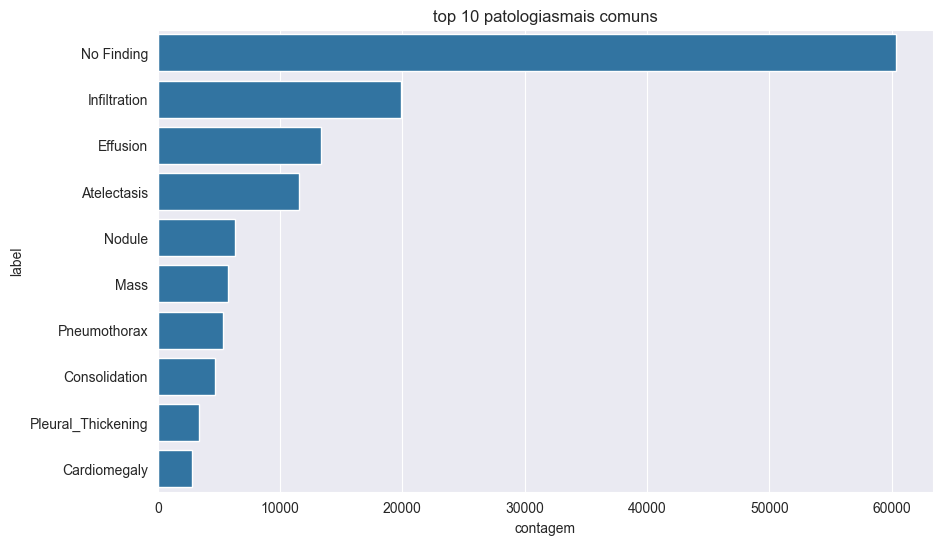

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=labels_counts, y=labels_names, orient='h')
plt.title('top 10 patologiasmais comuns')
plt.xlabel('contagem')
plt.ylabel('label')
plt.show()


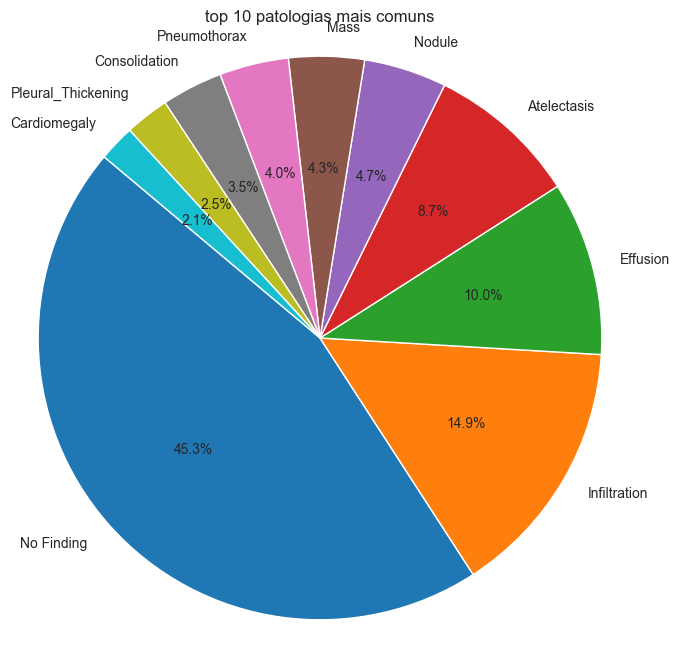

In [25]:
# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(labels_counts, labels=labels_names, autopct='%1.1f%%', startangle=140)
plt.title('top 10 patologias mais comuns')
plt.axis('equal')
plt.show()


In [21]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient Age,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],genero,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,faixa_etaria
0,00000001_000.png,[Cardiomegaly],0,58,PA,2682,2749,0.143,0.143,Male,...,0,0,0,0,0,0,0,0,0,"(50, 60]"
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,58,PA,2894,2729,0.143,0.143,Male,...,0,0,0,0,0,0,0,0,0,"(50, 60]"
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,58,PA,2500,2048,0.168,0.168,Male,...,0,0,0,0,0,0,0,0,0,"(50, 60]"
3,00000002_000.png,[No Finding],0,81,PA,2500,2048,0.171,0.171,Male,...,0,0,0,0,0,0,0,0,1,"(80, 90]"
4,00000003_000.png,[Hernia],0,81,PA,2582,2991,0.143,0.143,Female,...,0,0,0,0,0,0,0,0,0,"(80, 90]"
